# Title: Building Machine Learning Algorithms on Pima Indians Diabetes Dataset to Predict Diabetes

# Introduction:
In this project we will perform exploratory data analysis on the Pima Indians Diabetes Database. "This dataset originated from the National Institute of Diabetes and Digestive and Kidney Diseases. The objective of the dataset is to diagnostically predict whether or not a patient has diabetes, based on certain diagnostic measurements included in the dataset. Several constraints were placed on the selection of these instances from a larger database. In particular, all patients here are females at least 21 years old of Pima Indian heritage. The datasets consists of several medical predictor variables and one target variable, Outcome. Predictor variables includes the number of pregnancies the patient has had, their BMI, insulin level, age, and so on."

# Goal: 
To build a machine learning models to accurately predict whether or not the patients in the dataset have diabetes?

# Initial design:
To begin with, I will perform the necessary data processing, check for missing/null values, data format etc. Then I will visualize the data for data quality, perform correlation between the features, build and tune several machine learning models.

# Key Elements of the Design
In this design, I will perform a through exploratory data analysis and perform data visualization in each step so that I can double check the numbers generated with the visual plots. Data anomalies are much easier to pick from data visualization and also, it will be beneficial for my reviewers to obtain the key message in the data through visualization. 

In [59]:
import pandas as pd
import altair as alt
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from math import sqrt

In [60]:
# Import data
dib = pd.read_csv("diabetes.csv")

In [61]:
# Look at first six rows
dib.head(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
5,5,116,74,0,0,25.6,0.201,30,0


In [62]:
# Look at lastst six rows
dib.tail(6)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
762,9,89,62,0,0,22.5,0.142,33,0
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [63]:
# Look at info about the dataset
dib.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [64]:
# Look at the statistical summary of the dataset
dib.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [65]:
# Check for any null values
dib.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [66]:
dib.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
763    False
764    False
765    False
766    False
767    False
Length: 768, dtype: bool

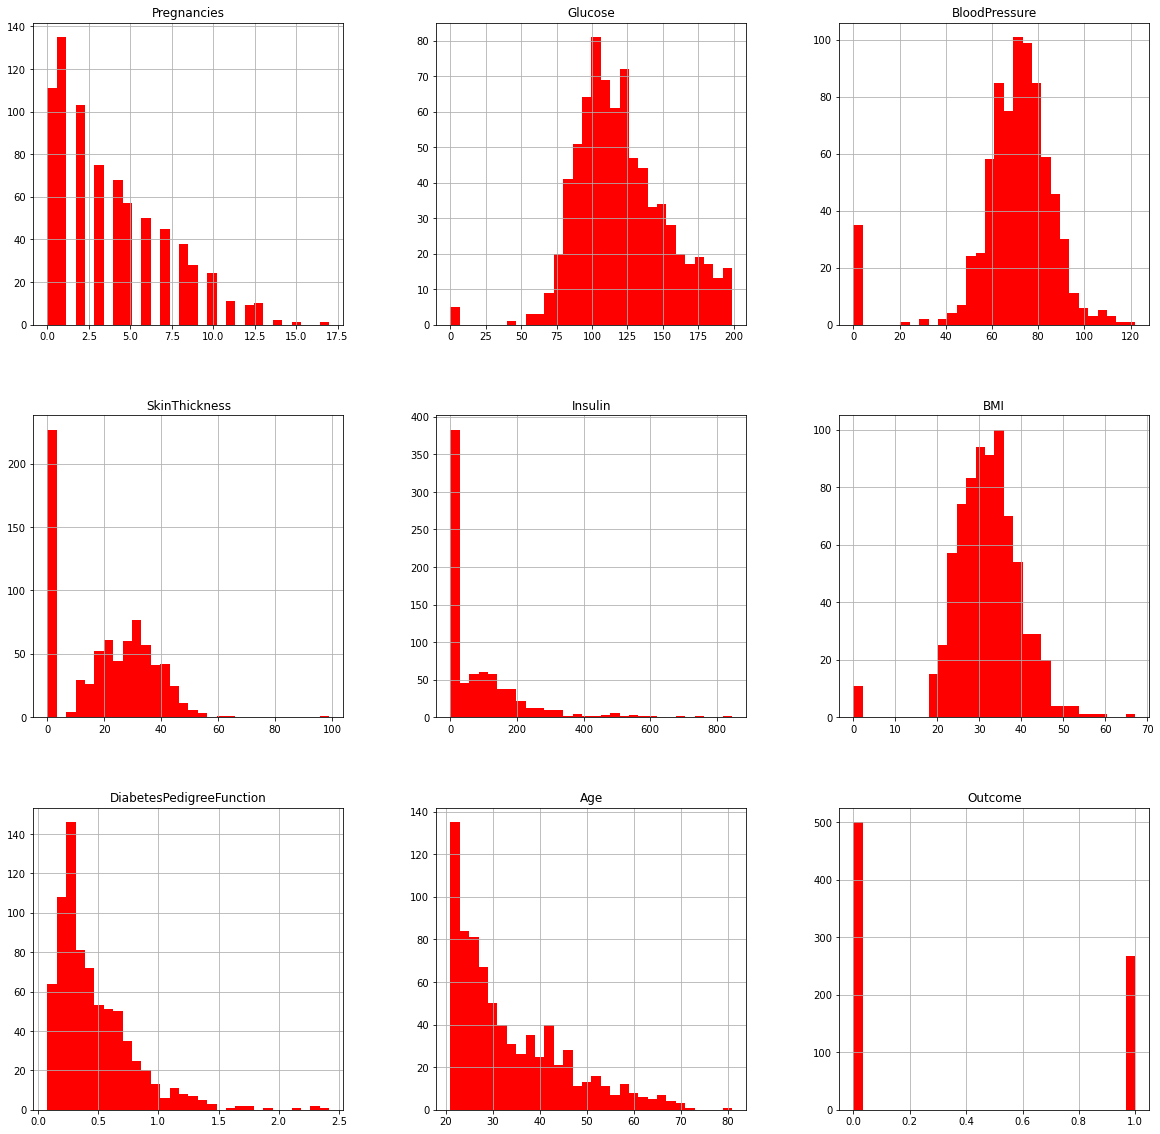

In [67]:
# Look at the data distribution of each column
dib.hist(bins = 30, figsize = (20, 20), color = 'r')
plt.show()

In [68]:
# The correlation matrix
dib.corr()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
Outcome,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


<AxesSubplot:>

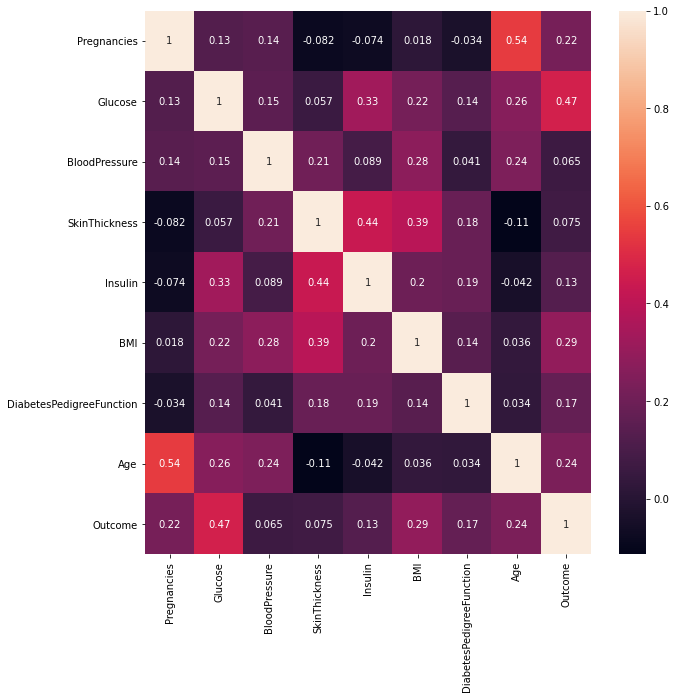

In [69]:
# Visualize the correlation in a heat map
plt.figure(figsize = (10, 10))
sns.heatmap(dib.corr(), annot = True)

In [70]:
# Extract the features 
features=dib.loc[:,dib.columns!='Outcome'].values
features

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [71]:
# Extract the labels
labels=dib.loc[:,'Outcome'].values
labels

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

In [72]:
# Scale the features between -1 and 1
scaler=MinMaxScaler((-1,1))
x=scaler.fit_transform(features)
y=labels

In [73]:
# Split the dataset to a train and a test set
x_train,x_test,y_train,y_test=train_test_split(x, y, test_size=0.20, random_state=3)

In [74]:
# Generate a Decision Tree Model
DecisionTree_model = DecisionTreeClassifier(max_depth=3, max_features=8)
DecisionTree_model.fit(x_train, y_train)

DecisionTreeClassifier(max_depth=3, max_features=8)

In [75]:
# Check accuracy of Decision Tree Model
accuracy_DecisionTree = DecisionTree_model.score(x_test, y_test)
print('Accuracy of Decision Tree Classifier Model:', round(accuracy_DecisionTree*100,1),'%')

Accuracy of Decision Tree Classifier Model: 64.3 %


In [76]:
# Generate a Random Forest Model
RandomForest_model = RandomForestClassifier(n_estimators = 100, max_depth = 5)

In [77]:
RandomForest_model.fit(x_train, y_train)

RandomForestClassifier(max_depth=5)

In [78]:
# Check the accuracy of Random Forest Model
accuracy_RandomForest= RandomForest_model.score(x_test, y_test)
print('Accuracy of Random Forest Classifier Model:', round(accuracy_RandomForest*100,1), '%')

Accuracy of Random Forest Classifier Model: 72.1 %


In [79]:
# Create and train the XGBoost Classifier Model
model = XGBClassifier()
model.fit(x_train,y_train)
# Check the accuracy of XGBoost Classifier Model
y_pred=model.predict(x_test)
y_train_predict = model.predict(x_train)
print('Train accuracy of XGBoost Classifier Model', accuracy_score(y_train, y_train_predict)*100, '%')
print('Test accuracy of XGBoost Classifier Model', accuracy_score(y_test, y_pred)*100, '%')

C:\Users\SK\anaconda3\lib\site-packages\xgboost\sklearn.py:1146: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[22:57:17] WARNING: D:\bld\xgboost-split_1631904903843\work\src\learner.cc:1095: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
Train accuracy of XGBoost Classifier Model 100.0 %
Test accuracy of XGBoost Classifier Model 70.77922077922078 %


<AxesSubplot:>

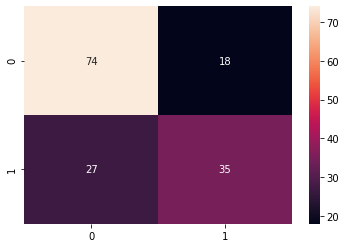

In [80]:
# Obtain Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot = True)

In [81]:
# Generate Classification Report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.80      0.77        92
           1       0.66      0.56      0.61        62

    accuracy                           0.71       154
   macro avg       0.70      0.68      0.69       154
weighted avg       0.70      0.71      0.70       154



In [82]:
RandomForest_model.feature_importances_

array([0.08057038, 0.37197203, 0.04287246, 0.0452304 , 0.07378724,
       0.15421941, 0.09533127, 0.13601681])

<AxesSubplot:>

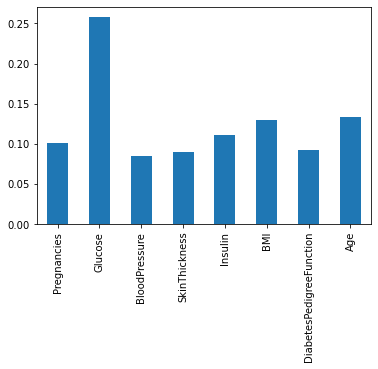

In [83]:
# Generate a feature importance map
X = dib.drop('Outcome', axis=1)

(pd.Series(model.feature_importances_, index=X.columns).plot(kind='bar'))

# Evaluation
I have this work evaluated with three of my friends and family members and here are their feedback:
1. Overall a neat project with clear visualizations.
2. Try several more machine learning algorithms for the predictive modelling.
3. publish the work in a blog post.



# Findings:
1. Between the three models, accuracy of Random Forest Classifier Model is 72.1%,  accuracy of Decision Tree Classifier Model is 64.3 % and test accuracy of XGBoost Classifier Model 70.8 %. 
2. From the feature importance plot we see that BMI, number of pregnancies, and age are important features for predicting the outcome (diabetes positive or negative). 

# Future improvements:
I would like to do hyperparameter tuning of these three models to improve the accuracy and also I would like to implement few other machine learning algorithms and compare their performances with these three models. 

# References:
Data source: Pima Indians Diabetes Database (https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database)